

```
Author ===> Jhanvi Shah
GitHub ===> @Jhanvi2001
Charotar University Of Science and Technology, CSPIT
Anand, Gujarat, India.
```



## **Libraries**

### **Installing Imageio**

In [ ]:
!pip install https://files.pythonhosted.org/packages/84/4f/c26bb91ad39ed2264518c189832f875acc58d6fcfe4d28e1527500b74894/imageio-2.19.3.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 3.1 MB 32.0 MB/s 
  Created wheel for imageio: filename=imageio-2.19.3-py3-none-any.whl size=3356296 sha256=81b80c038f1c8738b6c12095727a07921a8abc0080151233d398948c0d3bf085
  Stored in directory: /root/.cache/pip/wheels/99/05/8c/1b4d5fd4a77cc5985625d63b18a1de52d1a3a2079683a9501c
Successfully built imageio
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations

In [ ]:
import imageio
imageio.__version__

'2.19.3'

### **Importing**

In [ ]:
import os
import cv2
import numpy as np
from glob import glob
from PIL import Image
import imageio.v2 as imageio
from scipy import misc
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from matplotlib.patches import Circle, Ellipse
from matplotlib.patches import Rectangle


In [ ]:
import keras
import tensorflow
from matplotlib import pyplot as plt
import gzip
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from math import log10, sqrt
from tensorflow.keras.layers import BatchNormalization

## **Loading Data**

In [ ]:
data = glob('/content/drive/MyDrive/BISAG Internship/Dataset/GitHub_Dataset/training/Live/*')
len(data)

images = []
def read_images(data):
  for i in range(len(data)):
    img = imageio.imread(data[i])
    img = np.array(Image.fromarray(img).resize((224,224)))
    images.append(img)

  return images

images = read_images(data)
images_arr = np.asarray(images)
images_arr = images_arr.astype('float32')
images_arr.shape
images_arr = images_arr[...,0]

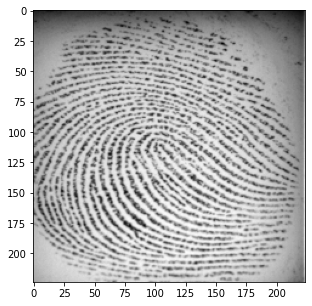

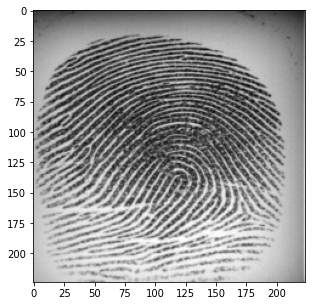

(1.0, 0.0)

In [ ]:
for i in range(2):
  plt.figure(figsize=[5,5])
  curr_img = np.reshape(images_arr[i], (224,224))
  plt.imshow(curr_img, cmap='gray')
  plt.show()

images_arr = images_arr.reshape(-1,224,224,1)
np.max(images_arr)
images_arr = images_arr / np.max(images_arr)
np.max(images_arr), np.min(images_arr)

## **Dataset Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_ground, valid_ground = train_test_split(images_arr, images_arr, test_size = 0.2, random_state=13)

batch_size = 5
epochs = 30
inChannel = 1
x,y = 224,224
input_img = Input(shape=(x,y, inChannel))

## **Defining AutoEncoder**

In [ ]:
def autoencoder(input_img):
  # encoder: input 28*28*1 (wide and thin)
  conv1 = Conv2D(32, (3,3), activation='relu', padding='same')(input_img) # 28 x 28 x 32
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) # 14 x 14 x 32
  conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) # 14 x 14 x 64
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) # 7 x 7 x 64
  conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) # 7 x 7 x 128 # small and thick

  # decoder
  conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) # 7 x 7 x 128
  up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
  conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
  up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1

  return decoded


autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop(),metrics=['accuracy'])

autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))


Epoch 1/30
32/32 [==============================] - 75s 2s/step - loss: 0.0344 - accuracy: 1.2456e-06 - val_loss: 0.0248 - val_accuracy: 3.4877e-06
Epoch 2/30
32/32 [==============================] - 76s 2s/step - loss: 0.0236 - accuracy: 2.1175e-06 - val_loss: 0.0178 - val_accuracy: 3.4877e-06
Epoch 3/30
32/32 [==============================] - 70s 2s/step - loss: 0.0199 - accuracy: 2.2421e-06 - val_loss: 0.0259 - val_accuracy: 3.4877e-06
Epoch 4/30
32/32 [==============================] - 71s 2s/step - loss: 0.0193 - accuracy: 2.2421e-06 - val_loss: 0.0168 - val_accuracy: 3.4877e-06
Epoch 5/30
32/32 [==============================] - 70s 2s/step - loss: 0.0187 - accuracy: 2.2421e-06 - val_loss: 0.0168 - val_accuracy: 3.4877e-06
Epoch 6/30
32/32 [==============================] - 71s 2s/step - loss: 0.0176 - accuracy: 2.2421e-06 - val_loss: 0.0175 - val_accuracy: 3.4877e-06
Epoch 7/30
32/32 [==============================] - 70s 2s/step - loss: 0.0164 - accuracy: 2.2421e-06 - val_loss

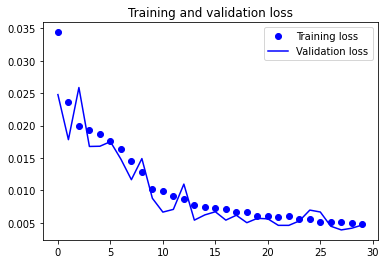

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(30)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Test Images


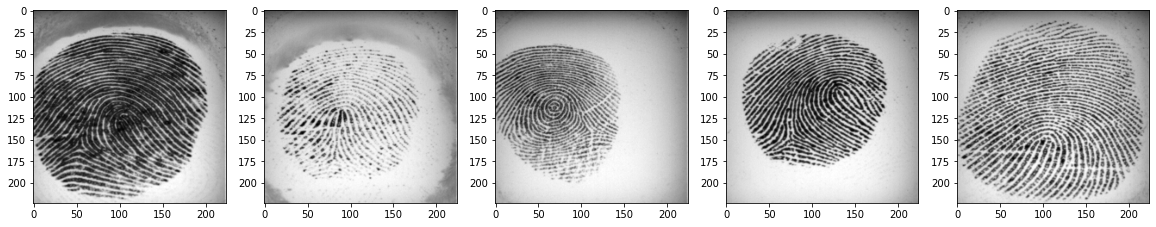

Reconstruction of Test Images


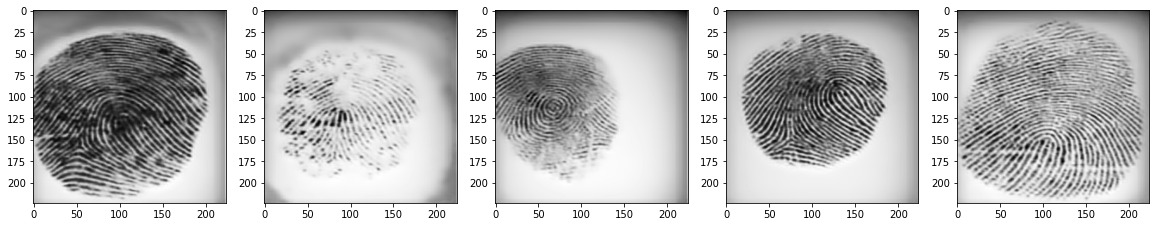

In [ ]:
pred = autoencoder.predict(valid_X)
plt.figure(figsize=(20, 20))
print("Test Images")

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(valid_ground[i, ..., 0], cmap='gray')

plt.show()    
plt.figure(figsize=(20, 20))
print("Reconstruction of Test Images")

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(pred[i, ..., 0], cmap='gray')  

plt.show()

## **Testing**

Test Images


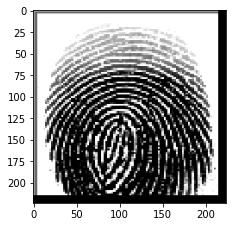

Reconstruction of Test Images


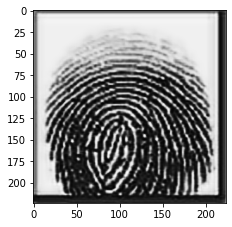

True

In [ ]:
test_image = tensorflow.keras.utils.load_img('/content/drive/MyDrive/1__M_Left_index_finger.BMP', target_size = (224,224))
images_arr1 = np.asarray(test_image)
images_arr1 = images_arr1.astype('float32')
images_arr1.shape
images_arr1=images_arr1[...,0]

images_arr1 = images_arr1.reshape(-1, 224,224, 1)
images_arr1 = images_arr1 / np.max(images_arr1)    
images_arr1= images_arr1.reshape(-1, 224,224, 1)
pred1 = autoencoder.predict(images_arr1)
plt.figure(figsize=(20, 4))
print("Test Images")

for i in range(1):
  plt.subplot(1, 5, i+1)
  plt.imshow(images_arr1[i, ..., 0], cmap='gray')

plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")

for i in range(1):
    plt.subplot(1, 5, i+1)
    plt.imshow(pred1[i, ..., 0], cmap='gray')  
plt.show()


cv2.imwrite('/content/drive/MyDrive/BISAG Internship/Dataset/AutoEncoder_Images/Image_One.bmp', pred[0,...,0])
cv2.imwrite('/content/drive/MyDrive/BISAG Internship/Dataset/AutoEncoder_Images/Image_One_Original.bmp', images_arr[0,...,0])

In [ ]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/BISAG Internship/Dataset/AutoEncoder_Images/Image_One_Original.bmp')
compressed = cv2.imread('/content/drive/MyDrive/BISAG Internship/Dataset/AutoEncoder_Images/Image_One.bmp', 1)
value = PSNR(original, compressed)
print(f"PSNR value is {value} dB")

PSNR value is 51.431743475637404 dB
